<div style="display: flex; align-items: center; justify-content: center; flex-wrap: wrap;">
    <div style="flex: 1; max-width: 400px; display: flex; justify-content: center;">
        <img src="https://i.ibb.co/JBPWVYR/Logo-Nova-IMS-Black.png" style="max-width: 50%; height: auto; margin-top: 50px; margin-bottom: 50px;margin-left: 6rem;">
    </div>
    <div style="flex: 2; text-align: center; margin-top: 20px;margin-left: 8rem;">
        <div style="font-size: 28px; font-weight: bold; line-height: 1.2;">
            <span style="color: #22c1c3;">DL Project |</span> <span style="color: #08529C;">Predicting Rare Species from Images using Deep Learning</span>
        </div>
        <div style="font-size: 17px; font-weight: bold; margin-top: 10px;">
            Spring Semester | 2024 - 2025
        </div>
        <div style="font-size: 17px; font-weight: bold;">
            Master in Data Science and Advanced Analytics
        </div>
        <div style="margin-top: 20px;">
            <div>André Silvestre, 20240502</div>
            <div>Diogo Duarte, 20240525</div>
            <div>Filipa Pereira, 20240509</div>
            <div>Maria Cruz, 20230760</div>
            <div>Umeima Mahomed, 20240543</div>
        </div>
        <div style="margin-top: 20px; font-weight: bold;">
            Group 37
        </div>
    </div>
</div>

<div style="background: linear-gradient(to right, #22c1c3, #27b1dd, #2d9cfd, #090979); 
            padding: 1px; color: white; border-radius: 500px; text-align: center;">
</div>

# **Project Structure**


<ol style="list-style-type: upper-roman;font-weight: bold;">
  <li><span style = "font-weight: normal;"><a href="#1">Data Understanding</a></span></li>
  <li>
    <span style="font-weight: normal;">
      <a href="#2">Data Preparation</a>
    </span>
    <ol style="list-style-type:decimal;">
      <li><span style="font-weight: normal;"><a href="#DP_NaNs">Missing Values</a></span></li>
      <li><span style="font-weight: normal;"><a href="#DP_Duplicates">Duplicates</a></span></li>
      <li><span style="font-weight: normal;"><a href="#DP_Outliers">Outliers</a></span></li>
    </ol>
  <li><span style="font-weight: normal;"><a href="./2_FeatureEngineering_MLProject_Group33.ipynb#DP_FeatureEng">Feature Engineering</a></span></li>
  <li><span style = "font-weight: normal;"><a href="./3_Modeling&Evaluation_MLProject_Group33.ipynb#3">Modeling & Evaluation</a></ol></li>
</ol>

# <a class='anchor' id='1'></a>

<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(to right, #22c1c3, #27b1dd, #2d9cfd, #090979); 
            padding: 15px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-left: 100px;margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 32px; font-family: 'Avenir Next LT Pro', sans-serif;"><b>1 | Business & Data Understanding</b></h1></center>
</div>

<br><br>

## **🎲 Dataset[<sup>[1]</sup>]((https://imageomics.github.io/bioclip/))**

- In this project, you will develop a deep-learning model to classify rare species based on their images. The dataset used in this project consists of images of **rare species** sourced from the Encyclopedia of Life (EOL) and curated as part of the **BioCLIP: A Vision Foundation Model for the Tree of Life [<sup>[1]</sup>]((https://imageomics.github.io/bioclip/))** study. Each image is associated with metadata, including its **`kingdom`**, **`phylum`**, and **`family`**. 

<br>

<center><img src="https://huggingface.co/datasets/imageomics/rare-species/resolve/main/visuals/phyla_ToL_tree.png" height="500"></center><br>
<center><b>Figure 1 | </b> Phylogenetic tree of the phyla in the dataset.</center> 
<center><b>Source: </b> <a href="https://huggingface.co/datasets/imageomics/rare-species">Hugging Face Datasets (2024)</a></center>

<br><br>

## **👨‍💻 Project Goals**

- The objective is to build a **model that predicts the `family` of a given species based on its image**. 

- The dataset includes a structured `CSV` file containing the file path of each image alongside its corresponding labels. 

- As part of the project, you will need to create your own data splits into training, validation, and test sets. The training and validation sets will be used to develop and fine-tune your model, while the test set should be kept separate to evaluate its performance on unseen data. 


<br><br>

### **Dataset Attributes: [<sup>[2]</sup>](https://huggingface.co/datasets/imageomics/TreeOfLife-10M)**

<center><b>Table 1 | </b> Dataset Attributes with Descriptions  <br><br>

|        |  **ATTRIBUTE**   |                   **DESCRIPTION**                                  | **DATA TYPE** |
|:------:|:----------------:|--------------------------------------------------------------------|:-------------:|
| **1** | `rare_species_id` | Unique identifier for the image in the dataset.                    | String        |
| **2** | `eol_content_id`  | Unique identifier within EOL database for images sourced from EOL. | Int           |
| **3** | `eol_page_id`     | Identifier of page from which images from EOL are sourced.         | Int           |
| **4** | `kingdom`         | Kingdom to which the subject of the image belongs (all Animalia).  | String        |
| **5** | `phylum`          | Phylum to which the subject of the image belongs.                  | String        |
| **6** | `family`          | Family to which the subject of the image belongs.                  | String        |
| **7** | `file_path`       | Path to the image file.                                            | String        |

</center>

<br><br>

<div style="background: linear-gradient(to right, #22c1c3, #27b1dd, #2d9cfd, #090979); 
            padding: 1px; color: white; border-radius: 500px; text-align: center;">
</div>

## 📚 **Libraries Import**

In [17]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [18]:
# Print python version
import sys
print(sys.version)

3.11.11 | packaged by conda-forge | (main, Mar  3 2025, 20:29:43) [MSC v.1943 64 bit (AMD64)]


In [19]:
# System imports
import os
import sys
from tqdm import tqdm
from typing_extensions import Self, Any      # For Python 3.10
# from typing import Self, Any               # For Python >3.11

from pathlib import Path

# Data manipulation imports
import numpy as np
import pandas as pd  
import warnings
warnings.filterwarnings("ignore")

# Data visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Machine learning imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

# Deep learning imports
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import Adam

# Evaluation imports
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score

# Other imports
from itertools import product

# Image processing imports
from matplotlib.image import imread
from PIL import Image

# Set the style of the visualization
pd.set_option('future.no_silent_downcasting', True)   # use int instead of float in DataFrame
pd.set_option("display.max_columns", None)            # display all columns

# Disable warnings (FutureWarning)
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# For better resolution plots
%config InlineBackend.figure_format = 'retina'
# Setting seaborn style
sns.set_theme(style="white")

# Set random seed for reproducibility
np.random.seed(2025)

In [20]:
print("TensorFlow Version:", tf.__version__)
print("Is TensorFlow built with CUDA?", tf.test.is_built_with_cuda())
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print("GPU Device Name:", tf.test.gpu_device_name())

if tf.test.is_built_with_cuda():
    tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)

TensorFlow Version: 2.18.0
Is TensorFlow built with CUDA? False
GPU Available: []
GPU Device Name: 


---

## 🧮 **Import Databases**

In [21]:
# Load the data
rare_species_df = pd.read_csv("../rare_species 1/metadata.csv")

# Display the first 5 rows of the dataset
rare_species_df.head(5)

,rare_species_id,eol_content_id,eol_page_id,kingdom,phylum,family,file_path
0,75fd91cb-2881-41cd-88e6-de451e8b60e2,12853737,449393,animalia,mollusca,unionidae,mollusca_unionidae/12853737_449393_eol-full-si...
1,28c508bc-63ff-4e60-9c8f-1934367e1528,20969394,793083,animalia,chordata,geoemydidae,chordata_geoemydidae/20969394_793083_eol-full-...
2,00372441-588c-4af8-9665-29bee20822c0,28895411,319982,animalia,chordata,cryptobranchidae,chordata_cryptobranchidae/28895411_319982_eol-...
3,29cc6040-6af2-49ee-86ec-ab7d89793828,29658536,45510188,animalia,chordata,turdidae,chordata_turdidae/29658536_45510188_eol-full-s...
4,94004bff-3a33-4758-8125-bf72e6e57eab,21252576,7250886,animalia,chordata,indriidae,chordata_indriidae/21252576_7250886_eol-full-s...


In [22]:
# Number of rows and columns
print("\033[1mDataset \033[0m")
print("  Number of rows:", rare_species_df.shape[0])
print("  Number of columns:", rare_species_df.shape[1])

# Name of the columns
print("\n\033[1mColumns \033[0m")
print("  ", rare_species_df.columns.to_list())

Dataset 
  Number of rows: 11983
  Number of columns: 7

Columns 
   ['rare_species_id', 'eol_content_id', 'eol_page_id', 'kingdom', 'phylum', 'family', 'file_path']


In [23]:
# Colors list for plotting
colors = ['#22c1c3', '#27b1dd', '#2d9cfd', '#090979']

## 📋 **Evaluate Data**

> aaaaaaaaaaa

### 🔄 **Duplicates**

In [24]:
# Checking for duplicates
print(f"\nNumber of duplicate rows: {rare_species_df.duplicated().sum()}")


Number of duplicate rows: 0


### 🔢🔠 **Data Types**

In [25]:
# Check data types
pd.DataFrame(rare_species_df.dtypes, columns=['Data Type'])

,Data Type
rare_species_id,object
eol_content_id,int64
eol_page_id,int64
kingdom,object
phylum,object
family,object
file_path,object


### 🔎 **Missing Values and Distinct Values**

In [26]:
# Check for missing values (n = number of missing values & % = percentage of missing values)
pd.DataFrame({
    "n NAs": rare_species_df.isnull().sum(),
    "% NAs": round(rare_species_df.isnull().mean() * 100, 1)
})

,n NAs,% NAs
rare_species_id,0,0.0
eol_content_id,0,0.0
eol_page_id,0,0.0
kingdom,0,0.0
phylum,0,0.0
family,0,0.0
file_path,0,0.0


In [27]:
# Check for unique values in each column
pd.DataFrame(rare_species_df.nunique(), columns=['Number of Unique Values'])

,Number of Unique Values
rare_species_id,11983
eol_content_id,11983
eol_page_id,400
kingdom,1
phylum,5
family,202
file_path,11983


---

# <a class='anchor' id='2'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(to right, #22c1c3, #27b1dd, #2d9cfd, #090979); 
            padding: 10px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 32px; font-family: 'Avenir Next LT Pro', sans-serif;">
        <b>2 | Data Preparation</b></h1></center>
</div>

<br><br>

In [29]:
rare_species_df.head()

,rare_species_id,eol_content_id,eol_page_id,kingdom,phylum,family,file_path
0,75fd91cb-2881-41cd-88e6-de451e8b60e2,12853737,449393,animalia,mollusca,unionidae,mollusca_unionidae/12853737_449393_eol-full-si...
1,28c508bc-63ff-4e60-9c8f-1934367e1528,20969394,793083,animalia,chordata,geoemydidae,chordata_geoemydidae/20969394_793083_eol-full-...
2,00372441-588c-4af8-9665-29bee20822c0,28895411,319982,animalia,chordata,cryptobranchidae,chordata_cryptobranchidae/28895411_319982_eol-...
3,29cc6040-6af2-49ee-86ec-ab7d89793828,29658536,45510188,animalia,chordata,turdidae,chordata_turdidae/29658536_45510188_eol-full-s...
4,94004bff-3a33-4758-8125-bf72e6e57eab,21252576,7250886,animalia,chordata,indriidae,chordata_indriidae/21252576_7250886_eol-full-s...


Possible fixes:
- Column 'kingdom' has only one unique value, which is 'Animalia'. This column can be dropped.

---

---

## 🔎 **EDA - Exploratory Data Analysis**

### **`phylum`** variable

In [12]:
# Absolute and Relative Frequency of the 'phylum' column
pd.DataFrame({
    "n": rare_species_df['phylum'].value_counts(),
    "%": round(rare_species_df['phylum'].value_counts(normalize=True) * 100, 2)
}).sort_values(by='n', ascending=False)

,n,%
phylum,,
chordata,9952,83.05
arthropoda,951,7.94
cnidaria,810,6.76
mollusca,210,1.75
echinodermata,60,0.50


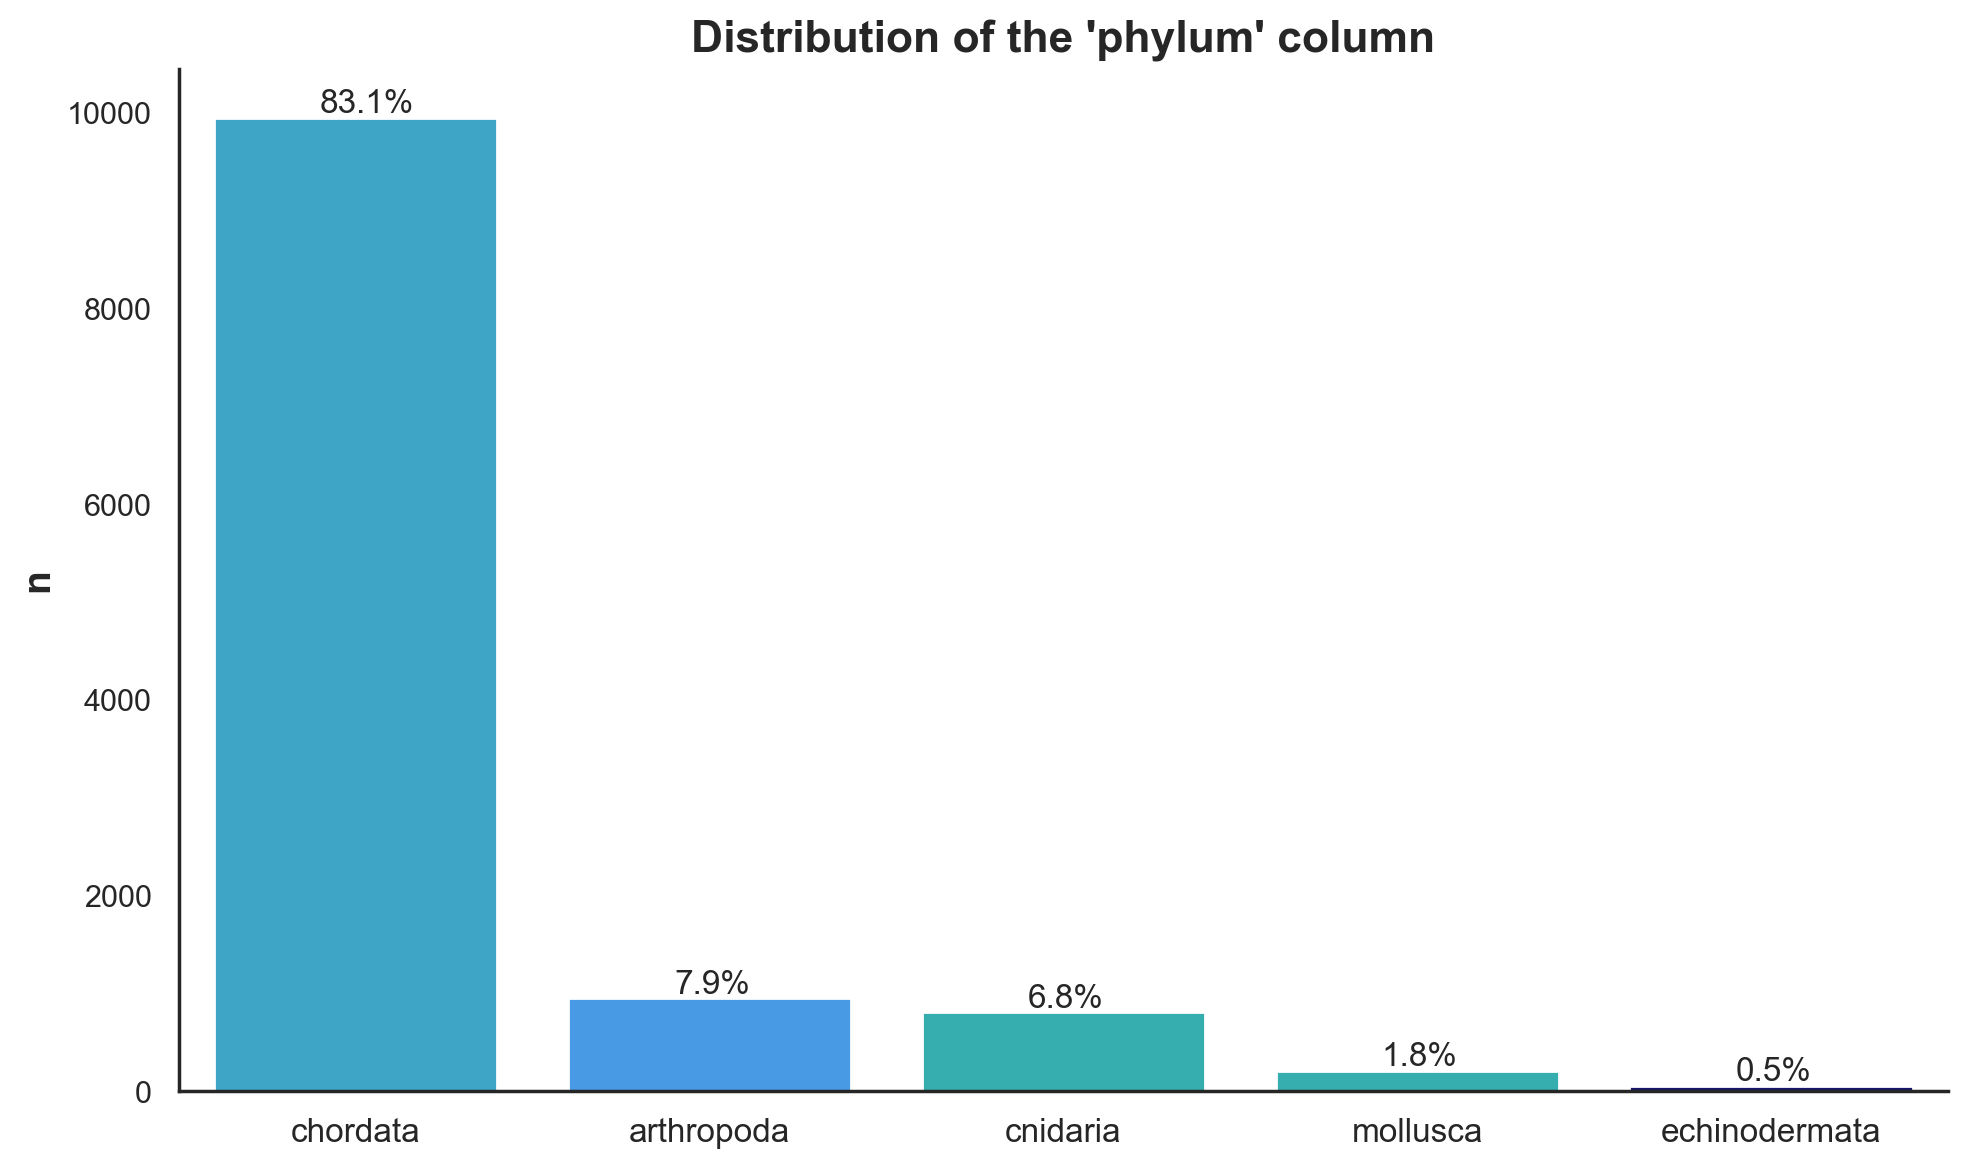

In [13]:
# Plot the distribution of the 'phylum' column
plt.figure(figsize=(10, 6))
sns.countplot(data=rare_species_df, 
              x='phylum', 
              order=rare_species_df['phylum'].value_counts().index,
              hue='phylum',
              palette=colors,
              stat='count')

# Annotate the plot with the percentage of each class
for p in plt.gca().patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / rare_species_df.shape[0])
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height() + 50
    plt.gca().annotate(percentage, (x, y), size = 12)


plt.title("Distribution of the 'phylum' column", fontsize=16, weight='bold')
plt.xlabel("")
plt.ylabel("n", fontsize=14, weight='bold')
plt.xticks(rotation=0, fontsize=12)
sns.despine(right=True, top=True)
plt.tight_layout()
plt.show()

### **`family` variable (Target Variable)**

In [14]:
# Distinct values of the 'family' column
pd.DataFrame(rare_species_df['family'].value_counts())

,count
family,
dactyloidae,300
cercopithecidae,300
formicidae,291
carcharhinidae,270
salamandridae,270
...,...
cyprinodontidae,30
alligatoridae,30
balaenidae,30


<hr style="border: 0; height: 2px; background: #ffcb05; width: 50%; margin: 20px auto;">
<blockquote style="font-size: 1em; font-style: italic; color: #ffcb05; padding: 20px; border-left: 5px solid #ff7f50; animation: slideUp 2s ease-in-out;">
  <ul style="list-style-type: disc; color: #ffcb05;">
    <li><span style="color: black;">Kingdom só tem uma coluna pode sair</span></li>
    <li><span style="color: black;">Family está imbalanced</span></li>
    Faz sentido procurar se a cada family corresponde a phylum certa?<br>
    Faz sentido de alguma forma o nosso modelo tentar prever phylum e só depois family?<br>
    Se usarmos <strong>OHE</strong>, a última camada deve ter <strong>Softmax</strong> e loss f.= <strong>categorical_crossentropy</strong><br>
    MARIA: Use `SparseCategoricalCrossentropy()` for model training in the loss function!!! Vem da Class2B With integer labels, you should use sparse_categorical_crossentropy:
    
  </ul>
</blockquote>

In [15]:
pd.DataFrame({
    'Family': rare_species_df['family'].value_counts().head(10).index,
    'n': rare_species_df['family'].value_counts().head(10).values,
    '%': rare_species_df['family'].value_counts(normalize=True).head(10).values * 100
})

,Family,n,%
0,dactyloidae,300,2.503547
1,cercopithecidae,300,2.503547
2,formicidae,291,2.428440
3,carcharhinidae,270,2.253192
4,salamandridae,270,2.253192
5,plethodontidae,270,2.253192
6,bovidae,240,2.002837
7,bucerotidae,210,1.752483
8,acroporidae,210,1.752483
9,diomedeidae,180,1.502128


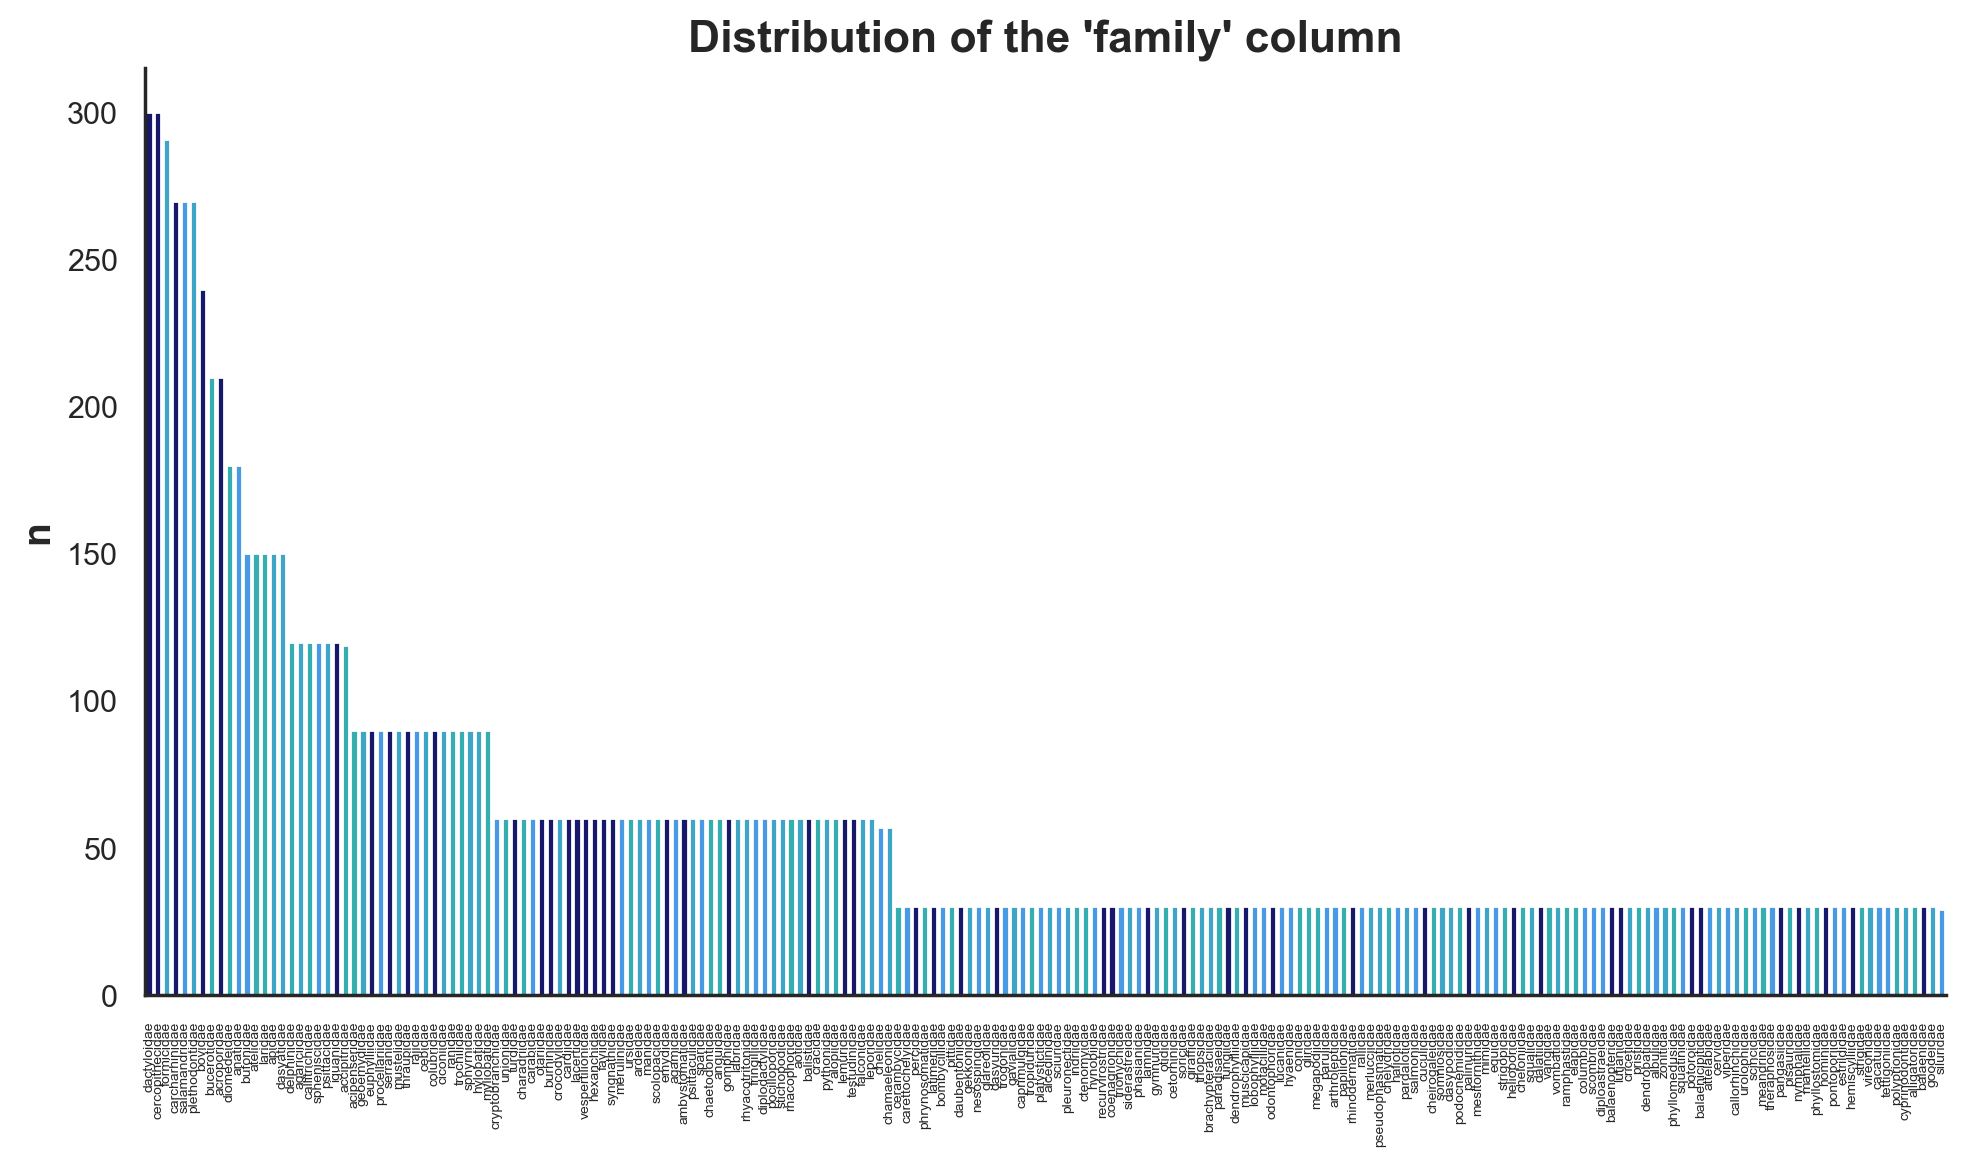

In [16]:
# Distribution of target variable ('family')
plt.figure(figsize=(10, 6))
sns.countplot(data=rare_species_df, 
              x='family', 
              order=rare_species_df['family'].value_counts().index,
              hue='family',
              palette=colors,
              stat='count')
    
plt.title("Distribution of the 'family' column", fontsize=16, weight='bold')
plt.xlabel("")
plt.ylabel("n", fontsize=14, weight='bold')
plt.xticks(rotation=90, fontsize=5)
sns.despine(right=True, top=True)
plt.tight_layout()
plt.show()

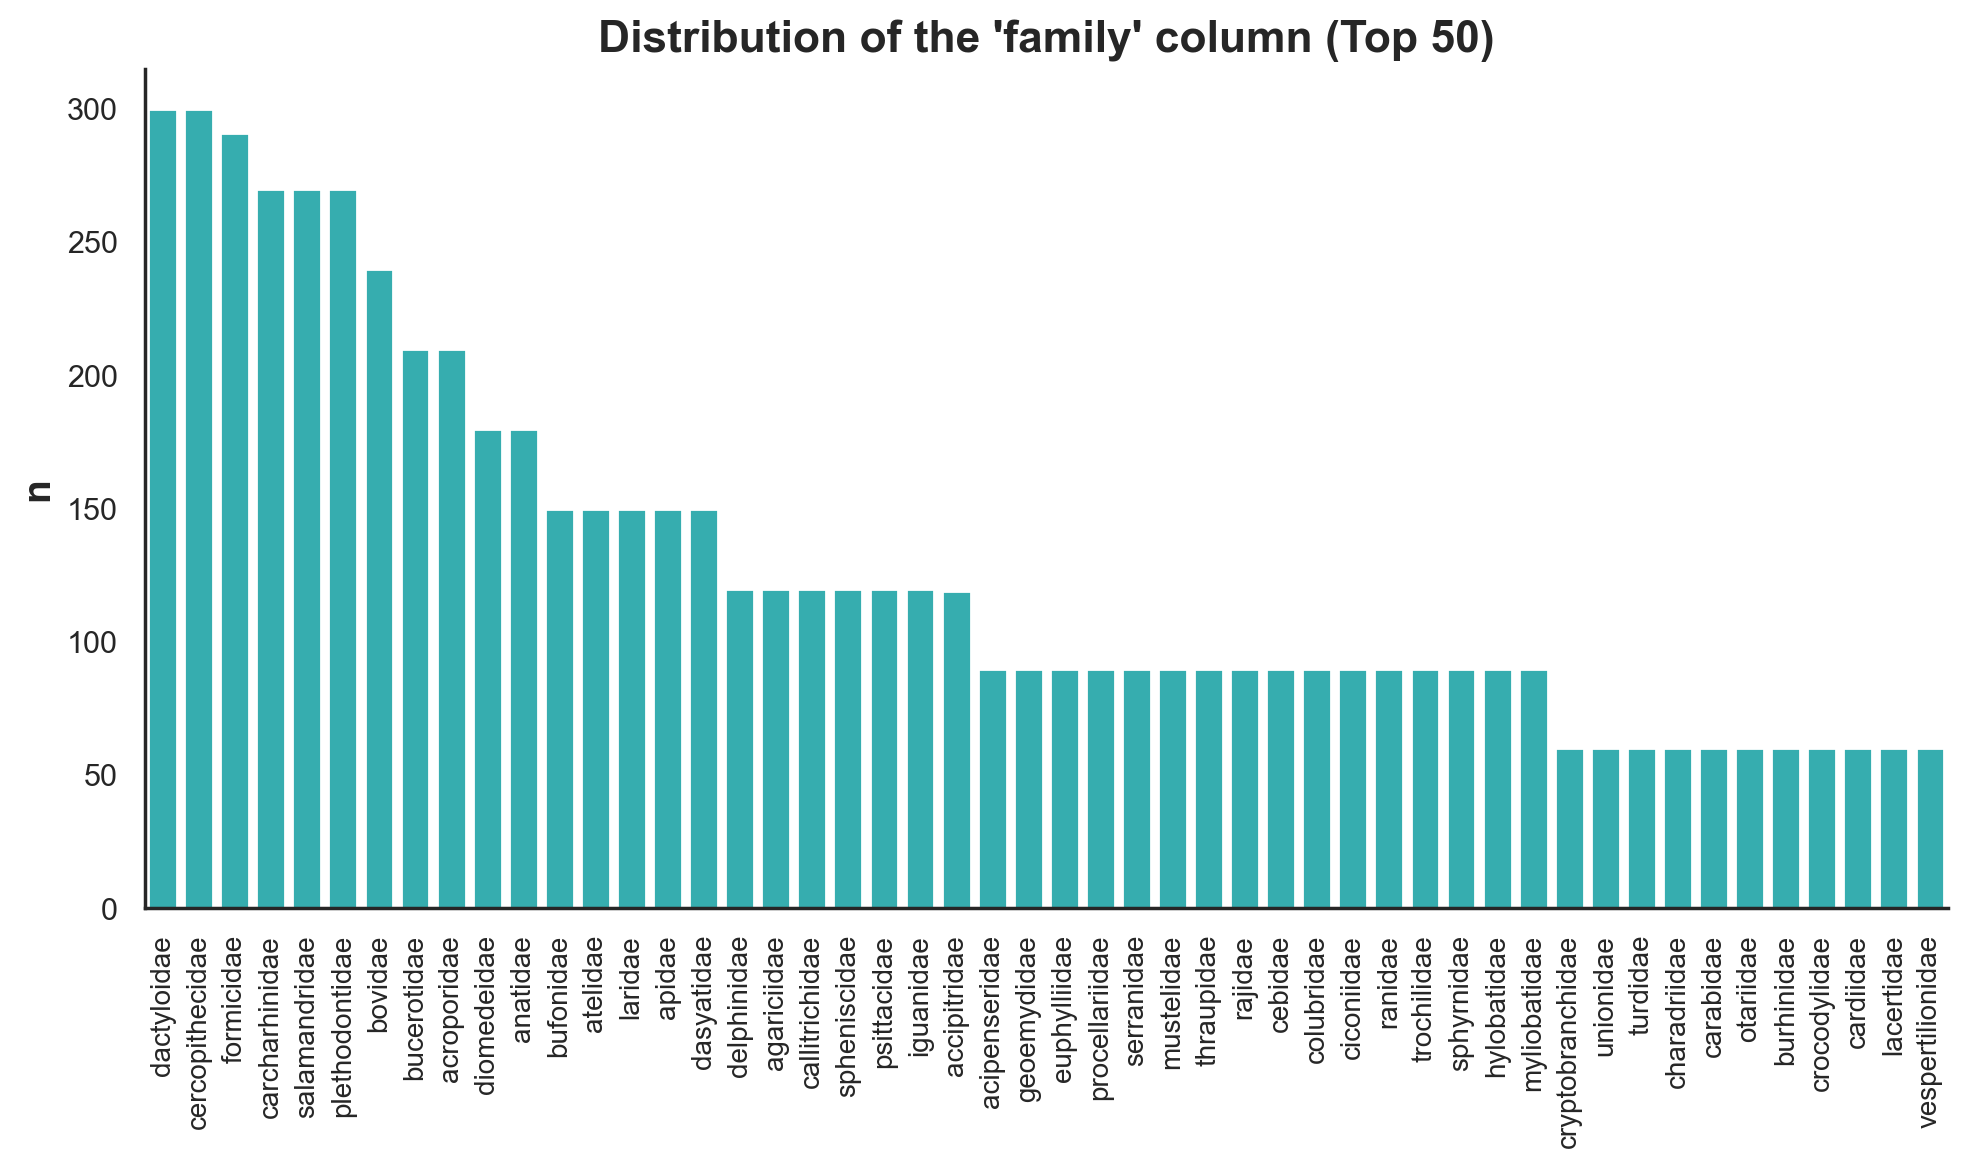

In [17]:
# Plot only the top 50 common families
plt.figure(figsize=(10, 6))
sns.countplot(data=rare_species_df.sort_values(by='family', ascending=False),
              x='family', 
              order=rare_species_df['family'].value_counts().index[:50],
              color=colors[0],
              stat='count')
plt.title("Distribution of the 'family' column (Top 50)", fontsize=16, weight='bold')
plt.xlabel("")
plt.ylabel("n", fontsize=14, weight='bold')
plt.xticks(rotation=90, fontsize=10)
sns.despine(right=True, top=True)
plt.tight_layout()
plt.show()

---

In [18]:
# Path to the folder
image_folder = './rare_species 1/'

# List all images in the folder
image_files = []
for root, _, files in os.walk(image_folder):
    for file in files:
        if file.lower().endswith(('.jpg')):
            image_files.append(os.path.join(root, file))

In [19]:
# Function to show an image
def show_image(image_path: str) -> None:
    """
    Displays an image given its path.
    """
    image = Image.open(image_path)      # Open the image
    plt.figure(figsize=(10, 10))        # Set the figure size   
    plt.imshow(image)                   # Display the image
    plt.axis('off')                     # Remove axis for cleaner visualization
    plt.show()                          # Show the image

In [20]:
# Show an example
if image_files:
    print(f"Displaying image: {image_files[0]}")
    show_image(image_files[0])
else:
    print("No images found in the folder.")

No images found in the folder.


In [21]:
# file_path structure:
# phylum_family/eol_content_id_eol_page_id
# (no new information can be extracted by the file_path column)

In [22]:
# Count the number of images
print("Number of images:", len(image_files))

Number of images: 0


## 🔧 **Data Pre-Proccessing**

In [23]:
# Encode the target variable ('family')
label_encoder = LabelEncoder()
rare_species_df['family_encoded'] = label_encoder.fit_transform(rare_species_df['family'])
num_classes = len(label_encoder.classes_)
print(f"\nNumber of unique families (classes): {num_classes}")


Number of unique families (classes): 202


> Para garantir que todos os numeros estão a associar bem (justificar o pq de não fazer só depois de dividir em treino e teste)

<hr style="border: 0; height: 2px; background: #ffcb05; width: 50%; margin: 20px auto;">
<blockquote style="font-size: 1em; font-style: italic; color: #ffcb05; padding: 20px; border-left: 5px solid #ff7f50; animation: slideUp 2s ease-in-out;">
  <ul style="list-style-type: disc; color: #ffcb05;">
    <li><span style="color: black;">
    Ponderámos usar OHE (prof. Mauro) mas uma vez que temos 202 classes, o OHE produziria vetores muito grandes (de 202 dim cada classe) e sparse; pode influenciar negativamente a performance e tempo de treino; já para não falar do consumo de memória
    </span></li>
    Não esquecer que os layer antes de 202 (último layer) têm de ter no mínimo 202 units
  </ul>
</blockquote>
</hr>

<hr style="border: 0; height: 2px; background: #ffcb05; width: 50%; margin: 20px auto;">
<blockquote style="font-size: 1em; font-style: italic; color: #ffcb05; padding: 20px; border-left: 5px solid #ff7f50; animation: slideUp 2s ease-in-out;">
  <ul style="list-style-type: disc; color: #ffcb05;">
    <li><span style="color: black;">
    In CNN, it is necessary for inputs and outputs to be numeric. Therefore, we need to convert each of the 202 rare species families into numbers using one-hot encoding. It is important that this conversion happens before the split, so we can more easily ensure consistency in the target labels and because we would run the risk of forgetting to apply encoding to any "family" that might not appear in the train dataset.</span></li>
  </ul>
  ACHO QUE NO KERAS EXISTE ENCODERS TMB <br>
from tensorflow.keras.utils import to_categorical <br>
...<br>
y_int = label_encoder.fit_transform(y)

y_one_hot = to_categorical(y_int)
</blockquote>
</hr>

### ⚖️ **Training/Validation Division**

<hr style="border: 0; height: 2px; background: #ffcb05; width: 50%; margin: 20px auto;">
<blockquote style="font-size: 1em; font-style: italic; color: #ffcb05; padding: 20px; border-left: 5px solid #ff7f50; animation: slideUp 2s ease-in-out;">
  <ul style="list-style-type: disc; color: #ffcb05;">
    <li><span style="color: black;">SHUFFLINGGGGGGGGGG antes do split</span></li>
  </ul>
</blockquote>
</hr>

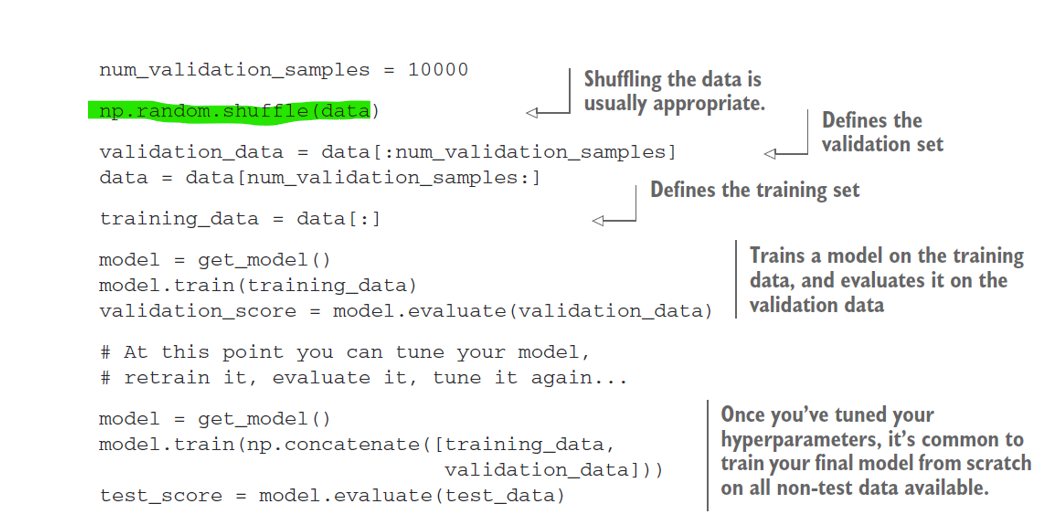

In [ ]:
# Split the dataset into train, validation, and test sets (70-20-10 split)
# Stratify on 'family' to maintain class distribution
train_df, temp_df = train_test_split(rare_species_df,
                                     test_size=0.3, 
                                     stratify=rare_species_df['family'], 
                                     random_state=2025,
                                     shuffle=True)
val_df, test_df = train_test_split(temp_df, 
                                   test_size=0.33, 
                                   stratify=temp_df['family'], 
                                   random_state=2025,
                                   shuffle=True)

In [ ]:
print(f"\n\033[1mTrain set size:\033[0m {len(train_df)} ({round(len(train_df) / len(rare_species_df) * 100, 2)}%)")
print(f"\033[1mValidation set size:\033[0m {len(val_df)} ({round(len(val_df) / len(rare_species_df) * 100, 2)}%)")
print(f"\033[1mTest set size:\033[0m {len(test_df)} ({round(len(test_df) / len(rare_species_df) * 100, 2)}%)")

### <a class='anchor' id='DP_FeatureEng'></a> 🛠️ **Feature Engineering**

<hr style="border: 0; height: 2px; background: #ffcb05; width: 50%; margin: 20px auto;">
<blockquote style="font-size: 1em; font-style: italic; color: #ffcb05; padding: 20px; border-left: 5px solid #ff7f50; animation: slideUp 2s ease-in-out;">
  <ul style="list-style-type: disc; color: #ffcb05;">
    <li><span style="color: black;">
    Apesar de uma das maiores propriedades de DL ser:<br>
Simplicity—Deep learning removes the need for <b>feature engineering</b>, replacing complex, brittle, engineering-heavy pipelines with simple, end-to-end trainable models that are typically built using only five or six different tensor operations.<br><br>
Vamos fazer na mesma

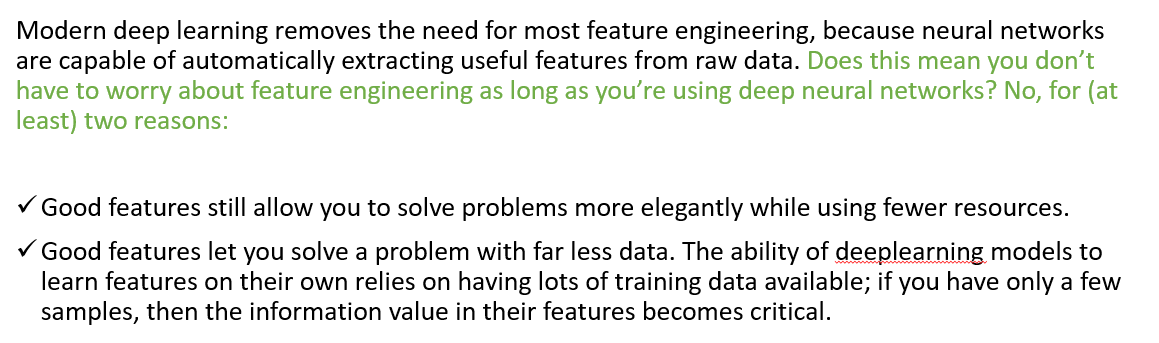

</blockquote>
<hr>

<hr style="border: 0; height: 2px; background: #ffcb05; width: 50%; margin: 20px auto;">
<blockquote style="font-size: 1em; font-style: italic; color: #ffcb05; padding: 20px; border-left: 5px solid #ff7f50; animation: slideUp 2s ease-in-out;">
  <ul style="list-style-type: disc; color: #ffcb05;">
    <li><span style="color: black;">
    Não esquecer de normalizar test com o train</span></li>
    <li><span style="color: black;">Este tipo de pre-processing até poderíamos ignorar porque simplicity, no entanto, iria levar + tempo, +epochs a lá chegar e makes learning harder (prof. Mauro disse em aula)</span></li>
  </ul>
</blockquote>
</hr>

<hr style="border: 0; height: 2px; background: #ffcb05; width: 50%; margin: 20px auto;">
<blockquote style="font-size: 1em; font-style: italic; color: #ffcb05; padding: 20px; border-left: 5px solid #ff7f50; animation: slideUp 2s ease-in-out;">
  <ul style="list-style-type: disc; color: #ffcb05;">
    <li><span style="color: black;">
    K-fold, k-fold cv, hold-out...</span></li>
   
  </ul>
</blockquote>
</hr>

<hr style="border: 0; height: 2px; background: #ffcb05; width: 50%; margin: 20px auto;">
<blockquote style="font-size: 1em; font-style: italic; color: #ffcb05; padding: 20px; border-left: 5px solid #ff7f50; animation: slideUp 2s ease-in-out;">
  <ul style="list-style-type: disc; color: #ffcb05;">
    <li><span style="color: black;">
    Class_3... <b>Redundancy</b> in your data—If some data points in your data appear twice (fairly common with real-world data), then shuffling the data and splitting it into a training set and a validation set will result in redundancy between the training and validation sets. In effect, you’ll be testing on part of your training data, which is the worst thing you can do! Make sure your training set and validation set are disjoint.<br>
    GARANTIR QUE NENHUMA FOTO SE REPETE
     </span></li>
   
  </ul>
</blockquote>
</hr>


<hr style="border: 0; height: 2px; background: #ffcb05; width: 50%; margin: 20px auto;">
<blockquote style="font-size: 1em; font-style: italic; color: #ffcb05; padding: 20px; border-left: 5px solid #ff7f50; animation: slideUp 2s ease-in-out;">
  <ul style="list-style-type: disc; color: #ffcb05;">
    <li><span style="color: black;">
before model development we need to prepare the input data and targets

VECTORIZATION

VALUE NORMALIZATION

HANDLING MISSING VALUES
</span></li>
   
  </ul>
</blockquote>
</hr>


<hr style="border: 0; height: 2px; background: #ffcb05; width: 50%; margin: 20px auto;">
<blockquote style="font-size: 1em; font-style: italic; color: #ffcb05; padding: 20px; border-left: 5px solid #ff7f50; animation: slideUp 2s ease-in-out;">
  <ul style="list-style-type: disc; color: #ffcb05;">
    <li><span style="color: black;">
Teste para ver se não fizémos overfit: testar diferentes shuffles, os resultados têm de ser =
</span></li>
   
  </ul>
</blockquote>
</hr>


<hr style="border: 0; height: 2px; background: #ffcb05; width: 50%; margin: 20px auto;">
<blockquote style="font-size: 1em; font-style: italic; color: #ffcb05; padding: 20px; border-left: 5px solid #ff7f50; animation: slideUp 2s ease-in-out;">
  <ul style="list-style-type: disc; color: #ffcb05;">
    <li><span style="color: black;">
Começar com arquiteturas bem simples (até para ter um baseline), ir complicando até que a redução na validation loss não seja assim tão grande
</span></li>
   
  </ul>
</blockquote>
</hr>

<hr style="border: 0; height: 2px; background: #ffcb05; width: 50%; margin: 20px auto;">
<blockquote style="font-size: 1em; font-style: italic; color: #ffcb05; padding: 20px; border-left: 5px solid #ff7f50; animation: slideUp 2s ease-in-out;">
  <ul style="list-style-type: disc; color: #ffcb05;">
    <li><span style="color: black;">
O stor Mauro não gostava muito de regularization para tratar overfit
</span></li></ul>
<ul style="list-style-type: disc; color: #ffcb05;">
    <li><span style="color: black;">
Experimentar GAN
</span></li>
   
  </ul>
</blockquote>
</hr>

### **Versão Maria**

---

In [ ]:
print(info[:5])

In [ ]:
print(len(np.unique(info)))

# (family)

In [ ]:
print(rare_species_df['file_path'].head())

In [ ]:
# Display the first few rows of the features and target variable
print("Features (X):", X[:5])
print("Target (y):", y[:5])

In [ ]:
# Reshape 'extracted_info' to a column vector (2D array)
extracted_info_reshaped = info.reshape(-1, 1)

# Concatenate the two arrays
X = np.concatenate((X, extracted_info_reshaped), axis=1)

In [ ]:
# Display the first few rows of the features and target variable
print("Features (X):", X[:5])
print("Target (y):", y[:5])

In [ ]:
print("kingdom unique values:", rare_species_df['kingdom'].unique())
print("eol_content_id unique values:", rare_species_df['eol_content_id'].nunique())
print("rare_species id unique values", rare_species_df['rare_species_id'].nunique())

# Do we really need the 'kingdom', 'eol_content_id' and 'rare_species_id' columns?

In [ ]:
# Drop the 'file_path' column from 'X' as it is not adding any new information

X = np.delete(X, 2, axis=1)  # Remove the 'file_path' column
print("Features (X):", X[:5])
print("Target (y):", y[:5])

In [ ]:
# List the number of columns of X and y

print(X.shape)
print(y.shape)

In [ ]:
# Transforming input categorical data into numerical data
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(drop="first"), [1])],    # Only select the 'phylum' column
    remainder='passthrough'
)

X = np.array(ct.fit_transform(X))

# Display the transformed feature set
print(X[:5])

In [ ]:
# Initialize and fit LabelEncoder
le = LabelEncoder()

# Transform the target variable (y) to integers (family)
y_encoded = le.fit_transform(y)

# Display encoded values
print("Encoded Target Values:", y_encoded[:10])

# Use `SparseCategoricalCrossentropy()` for model training in the loss function!!!

In [ ]:
print(len(np.unique(X)))
print(len(np.unique(X[:, 4]))) # 'eol_page_id' unique values

---

In [ ]:
# Display sample images with customized file path titles
def show_images(images, n=5):
    plt.figure(figsize=(24, 12))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        image = Image.open(images[i])
        plt.imshow(image)
        plt.axis('off')
        
        # Extract and display path after 'rare_species 1/'
        relative_path = images[i].split('rare_species 1/')[-1]
        plt.title(relative_path, fontsize=8)

    plt.tight_layout()
    plt.show()

# Map the values in X[:, 1] to the corresponding file paths in the dataset
image_paths = [os.path.join(image_folder, path) for path in rare_species_df['file_path']]

print("Displaying sample train images with file path titles:")
show_images(image_paths[:5])

In [ ]:
# Create a directory to save the processed images
Path("./data/processed_images").mkdir(parents=True,          # Create parent directories
                                      exist_ok=True)         # Only create if it does not exist

# Path to save/load processed images
processed_images_path = "./data/processed_images/processed_images.npy"

# Load and preprocess images with a loading bar and skip logic
def load_images(image_paths, img_size=(64, 64)):  
    
    # Check if processed images already exist
    if os.path.exists(processed_images_path):
        print("Loading previously processed images...")
        return np.load(processed_images_path)

    print("Processing images...")    
    images = []
    for path in tqdm(image_paths, desc="Loading Images", unit="img"):
        img = Image.open(os.path.join(image_folder, path)).convert('RGB')  
        img = img.resize(img_size)  
        img = np.array(img) / 255.0                                             # Normalize pixel values
        images.append(img)
    
    images_array = np.array(images)
    
    # Save processed images for future use
    np.save(processed_images_path, images_array)
    
    return images_array

# Load image data with progress bar and skip logic
processed_images = load_images(rare_species_df['file_path'].values)             ## Time of Execution: 12min

# Check the shape of the processed images
print("Processed Images Shape:", processed_images.shape)

In [ ]:
# Display sample processed images
processed_images[0]

In [ ]:
# Flatten the images for inclusion in feature set
image_features_flattened = processed_images.reshape(processed_images.shape[0], -1)

# Combine image data with other features
X_combined = np.hstack((X, image_features_flattened))  

print("Shape of new feature set (X):", X_combined.shape)

In [ ]:
# This is a representation of what we are currently feeding to the model (3 input features in X: image, eol_page_id, phylum):

# Correct phylum labels for drop='first' encoding ('arthropoda' was dropped)        // Enconder works in alphabetical order
phylum_labels = ['chordata', 'cnidaria', 'echinodermata', 'mollusca']

# Extract the one-hot encoded values for the second row
phylum_encoded = X[8, :4]  # Extracts the 4 encoded columns

# Check if all values are zero (meaning 'arthropoda')
if np.all(phylum_encoded == 0):
    phylum = 'arthropoda'
else:
    # Find the index of the 1 in the encoded array
    phylum_index = np.argmax(phylum_encoded)
    phylum = phylum_labels[phylum_index]

# Extract the remaining details
eol_page_id = X[8, 4]                                                               # 'EOL Page ID' is in column 4
image_path = os.path.join(image_folder, rare_species_df['file_path'].iloc[8])       # Image path

# Display details
print("=== Observation Details ===")
print(f"EOL Page ID: {eol_page_id}")
print(f"Phylum: {phylum}")
print(f"Image Path: {image_path}")

# Display the image
plt.figure(figsize=(5, 5))
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.title(f"EOL Page ID: {eol_page_id}\nPhylum: {phylum}")
plt.show()

---

# **💾 Save Data**

---

# **🔗 Bibliography/References**

**[[1]]([https:](https://imageomics.github.io/bioclip/))**  Stevens, S., Wu, J., Thompson, M. J., Campolongo, E. G., Song, C. H., Carlyn, D. E., ... & Su, Y. (2024). Bioclip: A vision foundation model for the tree of life. In Proceedings of the IEEE/CVF conference on computer vision and pattern recognition (pp. 19412-19424).

<br>

---